In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-muted') 
plt.rcParams.update({'figure.facecolor': 'white', 'axes.grid': True})

In [14]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_raw = pd.read_csv(url)
df = df_raw.copy()

print(f"Данные загружены. Строк: {df.shape[0]}, Колонок: {df.shape[1]}")

Данные загружены. Строк: 891, Колонок: 12


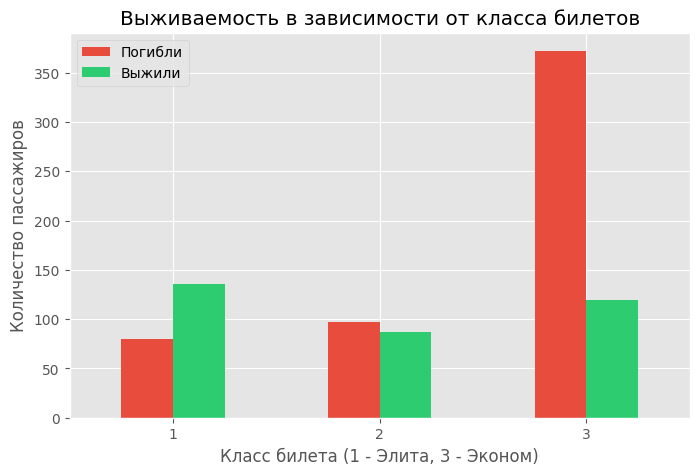

In [15]:

pclass_pivot = pd.crosstab(df_raw['Pclass'], df_raw['Survived'])
pclass_pivot.plot(kind='bar', color=['#e74c3c', '#2ecc71'], figsize=(8, 5))

plt.title('Выживаемость в зависимости от класса билетов')
plt.xlabel('Класс билета (1 - Элита, 3 - Эконом)')
plt.ylabel('Количество пассажиров')
plt.legend(['Погибли', 'Выжили'], loc='upper left')
plt.xticks(rotation=0)
plt.show()


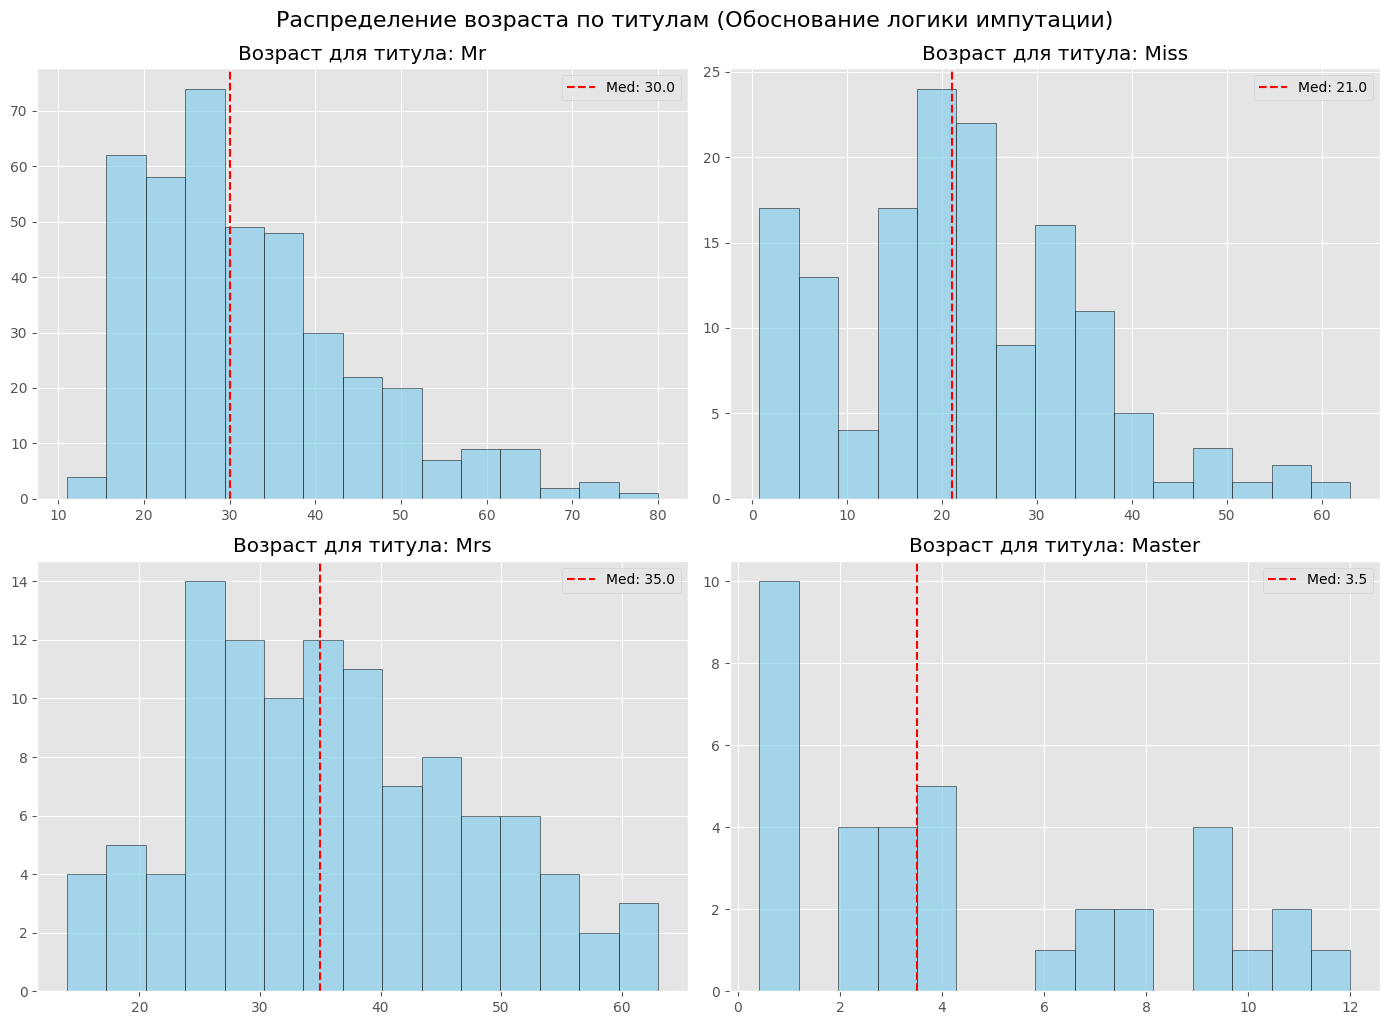

In [16]:


plot_df = df_raw.copy()

viz_df = df_raw.copy()
viz_df['Title'] = viz_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
titles_to_show = ['Mr', 'Miss', 'Mrs', 'Master']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, title in enumerate(titles_to_show):
    subset = viz_df[viz_df['Title'] == title]
    axes[i].hist(subset['Age'].dropna(), bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(subset['Age'].median(), color='red', linestyle='--', label=f'Med: {subset["Age"].median()}')
    axes[i].set_title(f'Возраст для титула: {title}')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Распределение возраста по титулам (Обоснование логики импутации)', y=1.02, fontsize=16)
plt.show()

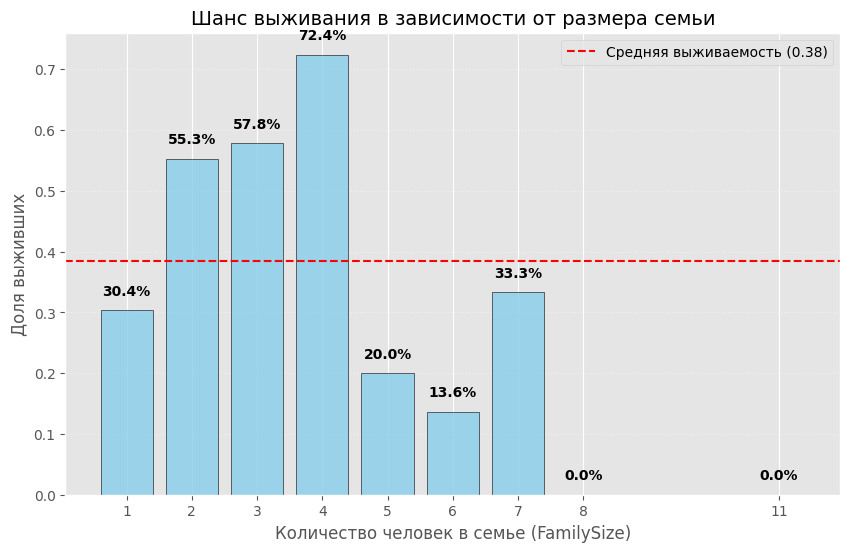

In [17]:

df_raw['FamilySize'] = df_raw['SibSp'] + df_raw['Parch'] + 1

family_surv = df_raw.groupby('FamilySize')['Survived'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(family_surv.index, family_surv.values, color='skyblue', edgecolor='black', alpha=0.8)


avg_surv = df_raw['Survived'].mean()
plt.axhline(avg_surv, color='red', linestyle='--', label=f'Средняя выживаемость ({avg_surv:.2f})')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.1%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Шанс выживания в зависимости от размера семьи', fontsize=14)
plt.xlabel('Количество человек в семье (FamilySize)')
plt.ylabel('Доля выживших')
plt.xticks(family_surv.index)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()

 


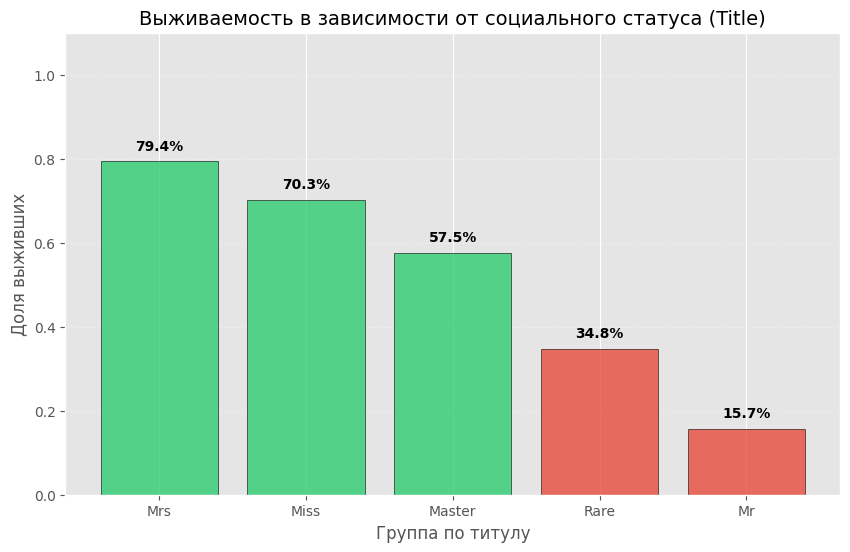

In [18]:

df_raw['Title'] = df_raw['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df_raw['Title'] = df_raw['Title'].replace(rare_titles, 'Rare').replace(['Mlle', 'Ms'], 'Miss').replace('Mme', 'Mrs')

status_surv = df_raw.groupby('Title')['Survived'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if x > 0.5 else '#e74c3c' for x in status_surv.values]
plt.bar(status_surv.index, status_surv.values, color=colors, edgecolor='black', alpha=0.8)

plt.title('Выживаемость в зависимости от социального статуса (Title)', fontsize=14)
plt.ylabel('Доля выживших')
plt.xlabel('Группа по титулу')
plt.ylim(0, 1.1)


for i, val in enumerate(status_surv.values):
    plt.text(i, val + 0.02, f'{val:.1%}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()





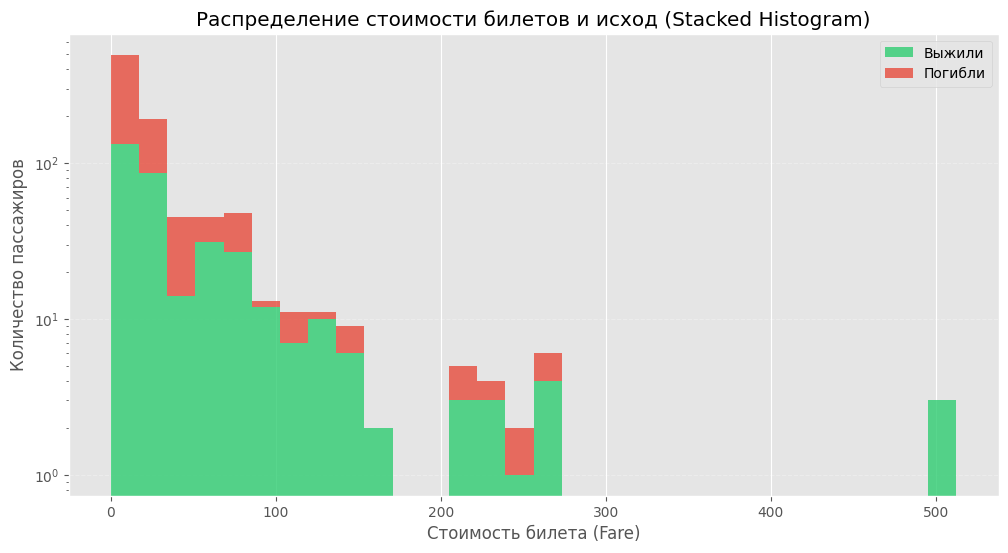

In [19]:

plt.figure(figsize=(12, 6))


survived_fare = df_raw[df_raw['Survived'] == 1]['Fare']
died_fare = df_raw[df_raw['Survived'] == 0]['Fare']

plt.hist([survived_fare, died_fare], bins=30, stacked=True, 
         color=['#2ecc71', '#e74c3c'], label=['Выжили', 'Погибли'], alpha=0.8)

plt.title('Распределение стоимости билетов и исход (Stacked Histogram)')
plt.xlabel('Стоимость билета (Fare)')
plt.ylabel('Количество пассажиров')
plt.yscale('log') 
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

